# Visualising & Interpreting Wearables Data (ECG & BP measurements)

In [1]:
# Import necessary libraries
import dash
from dash import html, dcc
from dash.dependencies import Input, Output
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os 
import matplotlib.pyplot as plt
import neurokit2 as nk

In [2]:
#get current working directory

os.getcwd()

'C:\\Users\\georg\\Documents'

In [3]:
# Load the dataset
file_path = 'data_task_interview.csv'  # Update this path as necessary
ecg_bp_data = pd.read_csv(file_path)

In [4]:
#looking at the dataset
ecg_bp_data

,sampleNum,ecg,ibp1,ibp2
0,4100404,1251,63.0,3.0
1,4100405,1270,63.0,3.0
2,4100406,1290,63.0,3.0
3,4100407,1295,63.0,3.0
4,4100408,1296,63.0,3.0
...,...,...,...,...
21995,4122399,1276,83.0,13.0
21996,4122400,1273,82.0,13.0
21997,4122401,1275,81.0,13.0
21998,4122402,1274,80.0,13.0


In [5]:
#obtaining summary stats for the dataset#
df = pd.DataFrame(ecg_bp_data)

summary_stats = df.describe()

print(summary_stats)


          sampleNum           ecg          ibp1          ibp2
count  2.200000e+04  22000.000000  22000.000000  22000.000000
mean   4.111404e+06   1309.739636     86.103624     10.531012
std    6.350997e+03     54.345372     70.174246      4.036569
min    4.100404e+06   1215.000000      0.000000      0.000000
25%    4.105904e+06   1276.000000      7.000000      9.000000
50%    4.111404e+06   1290.000000     77.000000     12.000000
75%    4.116903e+06   1315.000000    124.000000     13.000000
max    4.122403e+06   1578.000000    250.000000     25.000000


In [6]:
# Create a new column 'time' that starts at 0 and increases by 5 milliseconds for each row
df['time_msec'] = df.index * 5  # 5 milliseconds per row

In [7]:
df

,sampleNum,ecg,ibp1,ibp2,time_msec
0,4100404,1251,63.0,3.0,0
1,4100405,1270,63.0,3.0,5
2,4100406,1290,63.0,3.0,10
3,4100407,1295,63.0,3.0,15
4,4100408,1296,63.0,3.0,20
...,...,...,...,...,...
21995,4122399,1276,83.0,13.0,109975
21996,4122400,1273,82.0,13.0,109980
21997,4122401,1275,81.0,13.0,109985
21998,4122402,1274,80.0,13.0,109990


In [8]:
# Convert time from milliseconds to seconds (divide by 1000)
df['time_seconds'] = df['time_msec'] / 1000

# Convert time from milliseconds to minutes (divide by 60,000)
df['time_minutes'] = df['time_msec'] / 60000

In [9]:
df

,sampleNum,ecg,ibp1,ibp2,time_msec,time_seconds,time_minutes
0,4100404,1251,63.0,3.0,0,0.000,0.000000
1,4100405,1270,63.0,3.0,5,0.005,0.000083
2,4100406,1290,63.0,3.0,10,0.010,0.000167
3,4100407,1295,63.0,3.0,15,0.015,0.000250
4,4100408,1296,63.0,3.0,20,0.020,0.000333
...,...,...,...,...,...,...,...
21995,4122399,1276,83.0,13.0,109975,109.975,1.832917
21996,4122400,1273,82.0,13.0,109980,109.980,1.833000
21997,4122401,1275,81.0,13.0,109985,109.985,1.833083
21998,4122402,1274,80.0,13.0,109990,109.990,1.833167


Text(0.5, 1.0, 'ECG Plot')

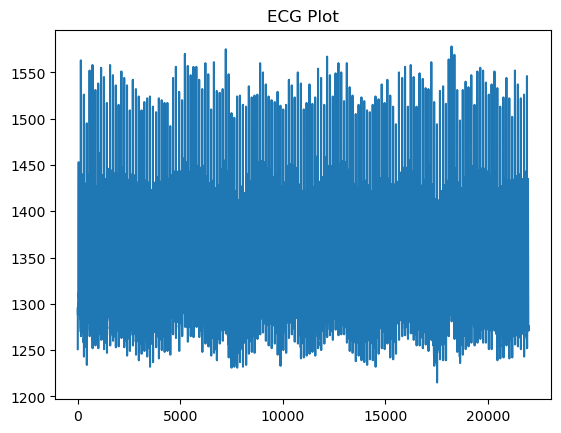

In [10]:
df["ecg"].plot()
plt.title("ECG Plot")

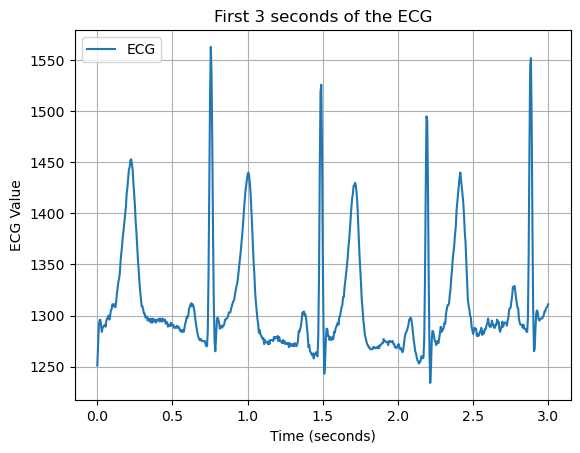

In [11]:
# Filter data for time <= 3 seconds (in this case, your data already fits within 3 seconds)
df_filtered = df[df['time_seconds'] <= 3]

# Plotting the ECG data for the first 3 seconds
plt.plot(df_filtered['time_seconds'], df_filtered['ecg'], label='ECG')
plt.title("First 3 seconds of the ECG")
plt.xlabel("Time (seconds)")
plt.ylabel("ECG Value")
plt.grid(True)
plt.legend()
plt.show()

In [12]:
# Given time difference between samples (5 milliseconds = 0.005 seconds)
time_diff_seconds = 0.005

# Calculate the sampling rate (in Hz)
sampling_rate_hz = 1 / time_diff_seconds

# Output the sampling rate in Hz
print(f"Sampling rate: {sampling_rate_hz} Hz")

Sampling rate: 200.0 Hz


In [20]:
ecg = nk.ecg_simulate(duration=15, sampling_rate=200, heart_rate=80)

print(ecg)

[1.09960162 1.01087386 0.78861746 ... 0.29369609 0.57134659 0.84755687]


In [21]:
# Extract the 'ecg' column as a numpy array
ecg_array = df['ecg'].to_numpy()

# Print the result
print(ecg_array)

[1251 1270 1290 ... 1275 1274 1275]


In [22]:
# Preprocess ECG signal

signals, info = nk.ecg_process(ecg_array, sampling_rate=200)

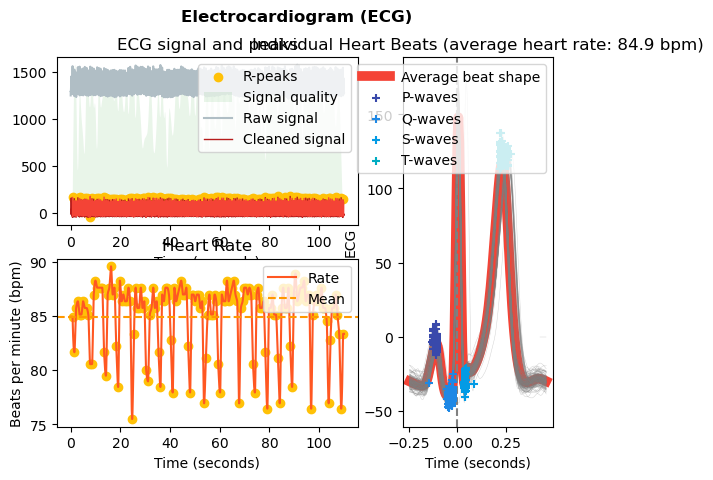

In [23]:
# Visualize

nk.ecg_plot(signals, info)